# <center> <h1> Echantillonnage - exercices </h1> </center>

<img src="./images/sample.png" width="300">

In [2]:
get_ipython().magic(u'matplotlib inline')
%run -i ./utils/credentials.py
%run -i ./utils/imports.py
%run -i ./utils/plots.py
%run -i ./utils/stats.py

# Boostrap

## Calcul d'un intervalle de confiance

Soit un échantillon $(X_1,...,X_n)$ de variables aléatoires identiquement distribuées, de moyenne $\mu$ et de variance $\sigma^2$ 

Calculer l'intervalle de confiance de la valeur ci-dessous à partir d'échantillons bootstrappés.

$$ \sqrt(n)\frac{\bar{X} - \mu}{\sigma}$$

#### Caractéristiques de l'échantillon [énoncé]

In [436]:
mean = 10
std = 1
sample_size = 10000
sample = np.random.normal(mean, std, size=sample_size)

##### Fonction de calcul de la valeur pour un échantillon [énoncé]

In [421]:
def calcul_value_TCL(sample, mean, std):
    n = len(sample)
    return np.sqrt(n)*(np.mean(sample) - mean)/std

##### Fonction de calcul de la valeur pour les échantillons boostrappés [réponse]

In [426]:
def bootstrap_TCL(sample, mean, std, boot_size = 1000):
    n = len(sample)
    TCL_boot = []
    for ii in range(boot_size) :
        sample_boot = np.random.choice(sample, n, replace=True)
        TCL_ii = calcul_value_TCL(sample_boot, mean, std)
        TCL_boot.append(TCL_ii)
    return TCL_boot

##### Calcul de l'intervalle de confiance empirique à partir des échantillons boostrappés [réponse]

In [437]:
TCL_boot = bootstrap_TCL(sample, mean, std, boot_size = 3000)

In [438]:
np.quantile(TCL_boot, q=[0.025,0.975])

array([-2.03284479,  1.99677238])

## Comparer les résultats 

Comparer l'intervalle de confiance trouvé à partir des échantillons boostrappés avec celui calculé à partir de nouveaux échantillons.

##### Comparaison des valeurs trouvées avec l'intervalle calculé à partir d'un jeu de nouveaux échantillons [réponse]

In [439]:
TCL_samples = []
for ii in range(10000):
    sample = np.random.normal(mean, std, size=sample_size)
    TCL_samples.append(calcul_value_TCL(sample, mean, std))
np.quantile(TCL_samples, q=[0.025,0.975])

array([-1.93843742,  1.9592184 ])

# Montrer l'avantage du bagging à partir d'un exemple simple

In [37]:
X = list(np.random.normal(-0.5, 0.7, size = 1000)) + list(np.random.normal(0.5, 0.5, size = 1000))
y = [-1 for ii in range(1000)] + [1 for ii in range(1000)]

data = pd.DataFrame({"X":X,"y":y})
data = data.sample(frac=1).reset_index(drop=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.X, data.y, test_size=0.33, random_state=42)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [38]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Confusion matrix, without normalization
[[259  70]
 [ 99 232]]


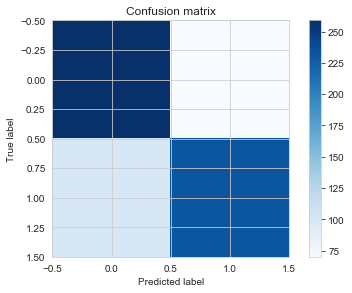

In [41]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#    tick_marks = np.arange(len(iris.target_names))
#    plt.xticks(tick_marks, iris.target_names, rotation=45)
#    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

plt.show()

In [ ]:
def bagging_decision_tree(nb_tree) :
    
for ii in range(X, y, nb_tree):
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)

##### Imports

In [2]:
get_ipython().magic(u'matplotlib inline')
%run -i ./utils/credentials.py
%run -i ./utils/imports.py
%run -i ./utils/plots.py
%run -i ./utils/stats.py

# Get more on my github <img src="./images/github.png" width="100">
https://github.com/JJublanc/statistics_tools

In [42]:
# jupyter nbconvert --to sampling_exercices.ipynb --post serve 